# GUIDE to Worksheet 2.2

This notebook is meant to provide hints and guidance on how to complete Worksheet 2.2: An introduction to OLS linear regression.  It will not necessarily answer every part of every problem, but it will get you to the interesting points of the worksheet.

Also, these guides may be useful for you as you are building up your coding toolkit to see different ways to execute different tasks in Python. I am not necessarily showing the most efficient or elegant code, but trying to illustrate different ways to do things.  You should always use the code you feel you can understand best.

---

First, let's take care of our imported modules.

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import scipy.stats as st
import seaborn as sns

## Note the modified import statement to only import one thing from the module.
from sklearn.linear_model import LinearRegression as skLinReg
import statsmodels.api as sm

sns.set(color_codes=True)

%matplotlib inline

## Part 1

Use the `help` function to look at the documentation for each of the 4 functions above.

In [2]:
help(np.polyfit)

Help on function polyfit in module numpy:

polyfit(x, y, deg, rcond=None, full=False, w=None, cov=False)
    Least squares polynomial fit.
    
    .. note::
       This forms part of the old polynomial API. Since version 1.4, the
       new polynomial API defined in `numpy.polynomial` is preferred.
       A summary of the differences can be found in the
       :doc:`transition guide </reference/routines.polynomials>`.
    
    Fit a polynomial ``p(x) = p[0] * x**deg + ... + p[deg]`` of degree `deg`
    to points `(x, y)`. Returns a vector of coefficients `p` that minimises
    the squared error in the order `deg`, `deg-1`, ... `0`.
    
    The `Polynomial.fit <numpy.polynomial.polynomial.Polynomial.fit>` class
    method is recommended for new code as it is more stable numerically. See
    the documentation of the method for more information.
    
    Parameters
    ----------
    x : array_like, shape (M,)
        x-coordinates of the M sample points ``(x[i], y[i])``.
    y : array_

In [3]:
help(st.linregress)

Help on function linregress in module scipy.stats._stats_mstats_common:

linregress(x, y=None, alternative='two-sided')
    Calculate a linear least-squares regression for two sets of measurements.
    
    Parameters
    ----------
    x, y : array_like
        Two sets of measurements.  Both arrays should have the same length.  If
        only `x` is given (and ``y=None``), then it must be a two-dimensional
        array where one dimension has length 2.  The two sets of measurements
        are then found by splitting the array along the length-2 dimension. In
        the case where ``y=None`` and `x` is a 2x2 array, ``linregress(x)`` is
        equivalent to ``linregress(x[0], x[1])``.
    alternative : {'two-sided', 'less', 'greater'}, optional
        Defines the alternative hypothesis. Default is 'two-sided'.
        The following options are available:
    
        * 'two-sided': the slope of the regression line is nonzero
        * 'less': the slope of the regression line is l

In [4]:
help(skLinReg)

Help on class LinearRegression in module sklearn.linear_model._base:

class LinearRegression(sklearn.base.MultiOutputMixin, sklearn.base.RegressorMixin, LinearModel)
 |  LinearRegression(*, fit_intercept=True, copy_X=True, n_jobs=None, positive=False)
 |  
 |  Ordinary least squares Linear Regression.
 |  
 |  LinearRegression fits a linear model with coefficients w = (w1, ..., wp)
 |  to minimize the residual sum of squares between the observed targets in
 |  the dataset, and the targets predicted by the linear approximation.
 |  
 |  Parameters
 |  ----------
 |  fit_intercept : bool, default=True
 |      Whether to calculate the intercept for this model. If set
 |      to False, no intercept will be used in calculations
 |      (i.e. data is expected to be centered).
 |  
 |  copy_X : bool, default=True
 |      If True, X will be copied; else, it may be overwritten.
 |  
 |  n_jobs : int, default=None
 |      The number of jobs to use for the computation. This will only provide
 |  

In [5]:
help(sm.OLS)

Help on class OLS in module statsmodels.regression.linear_model:

class OLS(WLS)
 |  OLS(endog, exog=None, missing='none', hasconst=None, **kwargs)
 |  
 |  Ordinary Least Squares
 |  
 |  Parameters
 |  ----------
 |  endog : array_like
 |      A 1-d endogenous response variable. The dependent variable.
 |  exog : array_like
 |      A nobs x k array where `nobs` is the number of observations and `k`
 |      is the number of regressors. An intercept is not included by default
 |      and should be added by the user. See
 |      :func:`statsmodels.tools.add_constant`.
 |  missing : str
 |      Available options are 'none', 'drop', and 'raise'. If 'none', no nan
 |      checking is done. If 'drop', any observations with nans are dropped.
 |      If 'raise', an error is raised. Default is 'none'.
 |  hasconst : None or bool
 |      Indicates whether the RHS includes a user-supplied constant. If True,
 |      a constant is not checked for and k_constant is set to 1 and all
 |      result s

These 4 implementations each have very different syntaxes for usage, and each return the fitted regression coefficients in different ways.  We'll see how this works when we apply them to simulated data.

## Part 2

Create some fake linear data.  That is, create two lists of numbers $X$ and $Y$ that may or may not be linearly related.  Make sure they are not identical and also not completely unrelated or the results will not be that interesting.

In [6]:
np.random.seed(12345)

N = 100

X = st.uniform.rvs(size=(N)) * 10 - 5

betaTrue = 4
intercept = 5
Y = betaTrue * X + intercept + st.norm.rvs(size=(N))

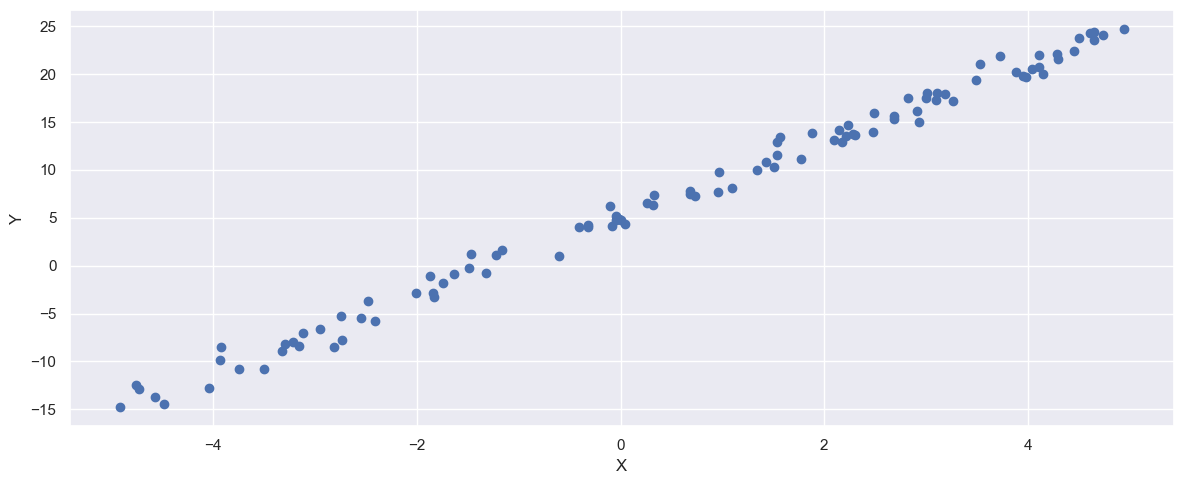

In [15]:
fig, ax = plt.subplots(1, 1, figsize=(12, 5))

_ = ax.scatter(X, Y)

_ = ax.set_xlabel("X")
_ = ax.set_ylabel("Y")

_ = fig.tight_layout()

## Part 3

Run each of the above functions and examine their output.  Answer the following for each function:
- How can you extract the regression coefficients?
- How can you get the residuals?  
- Which methods report "error" estimates in the coefficients?
- How easy is this method to use?
- Does this method fit the intercept ($\beta_0$)?

---

### `np.polyfit`

Starting with `np.polyfit`, we see from the documentation that we put in our covariates, `X`, then the response variable,  `Y`, followed by the [*degree*](https://en.wikipedia.org/wiki/Degree_of_a_polynomial) of the polynomial we want to fit.  In this case, we want to fit a line, so the degree is 1. Looking at the output, we can see that the function returns the fitted coefficients in order from the highest degree term to the lowest (in this case, the slope then the intercept).

We cannot directly get the residuals, but looking at the documentation, we see that there is a `full` keyword that outputs more information about the fitting process, including the sum of the squared residuals.  However, we will not get the other error information that other methods will produce.

What this function lacks in sophistication it makes up for with simplicity.  If you just need a line fit quickly, this is easy to use and already included in `numpy`.

This method fits the intercept by default.

In [8]:
coeffs = np.polyfit(X, Y, deg=1)

print(f"The fitted coeffs are {coeffs}")

coeffs, residuals, rank, singular_values, rcond = np.polyfit(X, Y, 1, full=True)

print(f"The sum of squared residuals is {residuals}")

The fitted coeffs are [4.0118807  5.03952838]
The sum of squared residuals is [95.30037147]


### `scipy.stats.linregress`

Moving on to `scipy.stats.linregress`, we see that the syntax is similar to `np.polyfit`, but a degree doesn't need to be specified because (as the name suggests), this method only fits linear functions. Unlike `np.polyfit`, the documentation notes that the output of this method is a `LinregressResult` object that has several attributes containing the information we might want, like the slope and intercept, the Pearson correlation coefficient, and the standard errors in the estimates.

Again, we cannot directly get the residuals as output, but we can use the fitted coefficients to calculate them.

This method is relatively easy to use, the only difficulty may be in the unusual structure of the output.

This method fits the intercept automatically.

In [9]:
res = st.linregress(X, Y)

print(f"R-squared: {res.rvalue**2:.6f}")

## Following the example in the documentation, we can calculate the 95% confidence
## intervals in the estimates using the standard error information!
tinv = lambda p, df: abs(st.t.ppf(p/2, df)) ## This is a "lambda" function, which is
                                            ## a simple syntax for short function definitions
ts = tinv(0.05, len(X)-2)

print(f"slope (95%): {res.slope:.6f} +/- {ts*res.stderr:.6f}")
print(f"intercept (95%): {res.intercept:.6f} +/- {ts*res.intercept_stderr:.6f}")

R-squared: 0.992601
slope (95%): 4.011881 +/- 0.069436
intercept (95%): 5.039528 +/- 0.199360


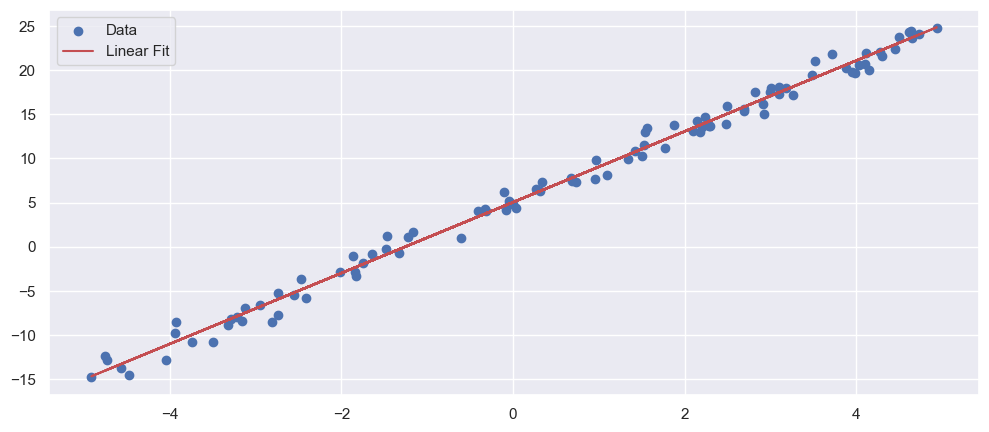

In [10]:
fig, ax = plt.subplots(1, 1, figsize=(12, 5))

_ = ax.scatter(X, Y, label='Data')
_ = ax.plot(X, res.intercept + res.slope * X, color='r', label='Linear Fit')

_ = ax.legend()

### `sklearn.linear_model.LinearRegression`

The next two methods are similar in that they make use of Python's **object-oriented** syntax, which you can learn more about by looking at the tutorial section on [Classes](https://ejohnson643.github.io/PythonTutorial/docs/11_Classes/11_Classes_Notebook.html).  For now, it will suffice to follow the examples here.  The gist is that we first need to initialize a `LinearRegression` object, which will look like a normal function call, but will generate an **instance** of a `LinearRegression`-type object as output.  This instance can then be used to fit the data and it will contain the outputs that we seek.

In this way, the coefficients are accessed similarly to `st.linregress`, where they are stored as attributes in an object. Unlike the `LinregressResult` object, the `LinearRegression` object also has methods like `predict` which we can use to calculate residuals quickly, as shown below.

Unlike `st.linregress` and `statsmodels.api.OLS`, the `sklearn.linear_model.LinearRegression` object will not generate traditional error calculations.

This method is definitely somewhat harder to get used to than the previous two, but this type of syntax is more common in advanced data science packages, especially machine learning and neural networks.

This method fits the intercept by default.

In [11]:
from sklearn.linear_model import LinearRegression as skLinReg  ## Notice the import syntax.

X = X.reshape(-1, 1) ## Adds a dimension to the array (makes X & Y column vectors)
Y = Y.reshape(-1, 1)

linRegObj = skLinReg()   ## Instantiate the object
linRegObj.fit(X, Y)      ## Fit the linear model

beta1 = linRegObj.coef_[0, 0]     ## We access the slope via the attribute `coef_`
beta0 = linRegObj.intercept_[0]
print(f"The fitted line is {beta1:.2f}X + {beta0:.2f}")

X_pred = linRegObj.predict(X)
resids =  Y - X_pred

The fitted line is 4.01X + 5.04


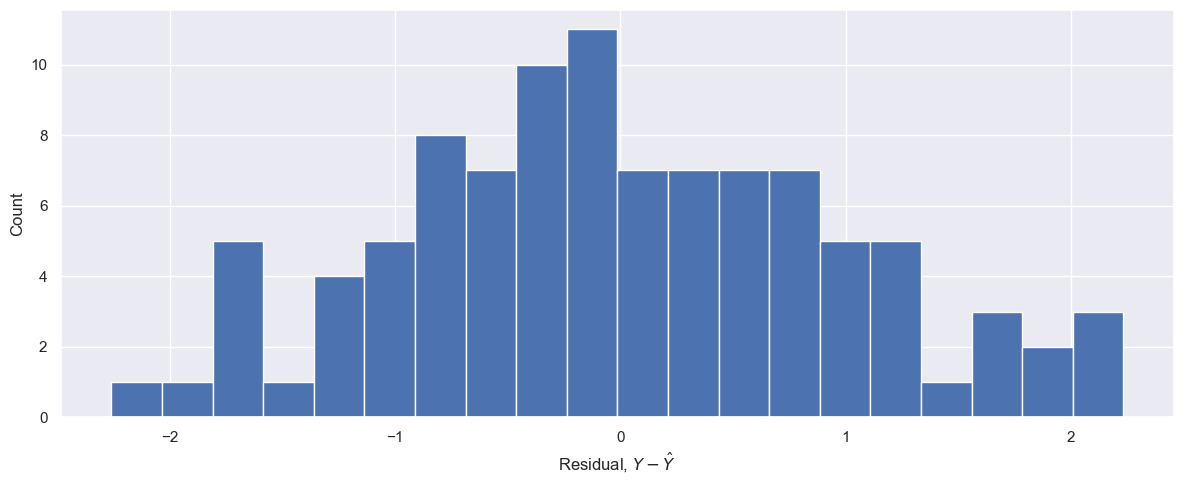

In [12]:
fig, ax = plt.subplots(1, 1, figsize=(12, 5))

_ = ax.hist(resids, bins=20)

_ = ax.set_xlabel(r"Residual, $Y - \hat{Y}$")
_ = ax.set_ylabel("Count")

_ = fig.tight_layout()

### `statsmodels.api.OLS`

Finally, we will look at the `statsmodels.api.OLS` method.  This is the most advanced and complicated method of those we'll examine, but it is also the most comprehensive.  The `statsmodels` package is designed to replicate traditional statistics packages, and so it performs many standard analyses and contains many standard quantities by default. This is shown with the `summary` method below, where we see a variety of statistics related to the fit. However, navigating these various terms and objects can make this hard for beginners to use.  It's worth noting the different usage syntax especially.

Accessing the different outputs is done similarly to the previous two methods, but there are significantly more attributes and methods to sort through.  The fitted coefficients can be recovered by accessing the `params` attribute of the `results` object, as shown below.  The standard errors are found in the `bse` attribute.

The residuals are not stored in the results object, but similarly to the `sklearn` fitter, the `results` object has a `predict` method that can be use to quickly generate the model's predictions, and thus its residuals.

This method does *not* fit the intercept by default, which is why we had to add a column to our covariates. (A column of constants can then have its "slope" fit, which will correspond to the intercept.)

In [13]:
import statsmodels.api as sm

smX = sm.add_constant(X) ## In order to fit an intercept term we need to
                         ## add a column of ones to the covariates.
# print(smX)

model = sm.OLS(Y, smX)   ## Note that the inputs are reversed compared to the other methods!
results = model.fit()

print(results.params)    ## The coefficients are in the `params` attribute of the results object

print(results.summary())

print(f"\n\nThe standard errors can be accessed here: {results.bse}")

[5.03952838 4.0118807 ]
                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.993
Model:                            OLS   Adj. R-squared:                  0.993
Method:                 Least Squares   F-statistic:                 1.315e+04
Date:                Tue, 21 Mar 2023   Prob (F-statistic):          3.14e-106
Time:                        16:25:18   Log-Likelihood:                -139.49
No. Observations:                 100   AIC:                             283.0
Df Residuals:                      98   BIC:                             288.2
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          5.0395      0